##Import Dataset

##Linear regression

<h3>Loading the model and fitting it with training data</h3>

<h3>Predict the testing data</h3>
Find the predicted values and evaluate it using metrics of linear regression

Please upload the 'Earthquake_Data.csv' file:


Saving Earthquake_Data.csv to Earthquake_Data (1).csv
Initial Data Preview:


,Date(YYYY/MM/DD),Time,Latitude,Longitude,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,EventID
0,1966/07/01,09:41:21.82,35.9463,-120.4700,12.26,3.2,Mx,7,171,20,0.02,NCSN,-4540462
1,1966/07/02,12:08:34.25,35.7867,-120.3265,8.99,3.7,Mx,8,86,3,0.04,NCSN,-4540520
2,1966/07/02,12:16:14.95,35.7928,-120.3353,9.88,3.4,Mx,8,89,2,0.03,NCSN,-4540521
3,1966/07/02,12:25:06.12,35.7970,-120.3282,9.09,3.1,Mx,8,101,3,0.08,NCSN,-4540522
4,1966/07/05,18:54:54.36,35.9223,-120.4585,7.86,3.1,Mx,9,161,14,0.04,NCSN,-4540594


Preprocessed Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18030 entries, 1966-07-01 09:41:21.820000 to 2007-12-28 23:20:28.120000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude(deg)    18030 non-null  float64
 1   Longitude(deg)   18030 non-null  float64
 2   Depth(km)        18030 non-null  float64
 3   Magnitude(ergs)  18030 non-null  float64
 4   Magnitude_type   18030 non-null  object 
 5   No_of_Stations   18030 non-null  int64  
 6   Gap              18030 non-null  int64  
 7   Close            18030 non-null  int64  
 8   RMS              18030 non-null  float64
 9   SRC              18030 non-null  object 
 10  EventID          18030 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.7+ MB


None

Preprocessed data written to Excel file: Earthquake_data_processed.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Linear Regression Performance:
R²: 0.03, MSE: 0.18


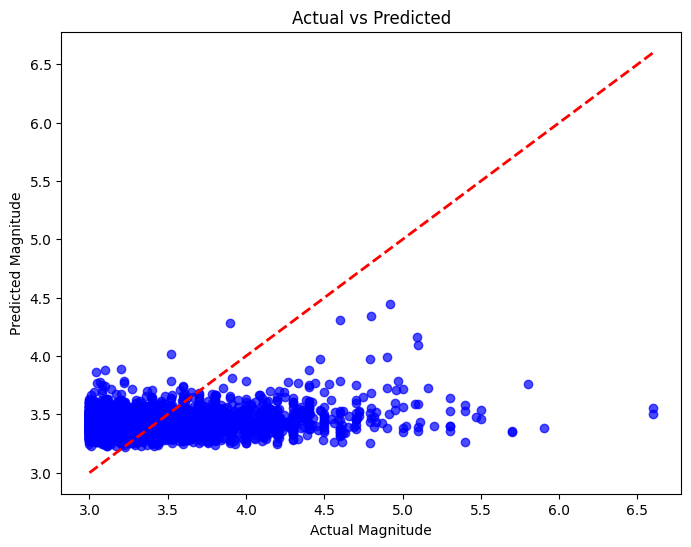

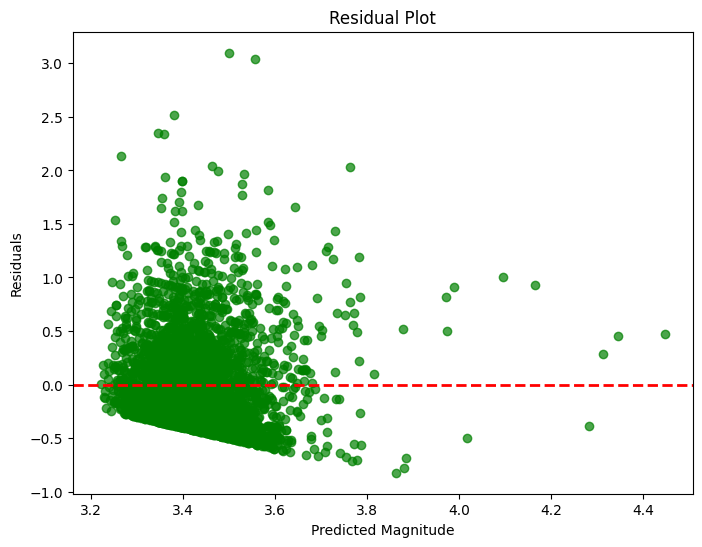

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from google.colab import files  # For uploading and downloading files

# Suppress warnings
warnings.filterwarnings('ignore')

# Upload the dataset
print("Please upload the 'Earthquake_Data.csv' file:")
uploaded = files.upload()  # Allows file upload in Colab

# Read the uploaded CSV file (using space delimiter)
df = pd.read_csv('/content/Earthquake_Data.csv', delimiter=r'\s+')

# Display the first 5 rows of the data frame
print("Initial Data Preview:")
display(df.head())

# Preprocessing
new_column_names = ["Date(YYYY/MM/DD)", "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)",
                    "Magnitude(ergs)", "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names
df['Timestamp'] = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])
df.set_index('Timestamp', inplace=True)
df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1, inplace=True)

# Display preprocessed data
print("Preprocessed Data Information:")
display(df.info())

# Export preprocessed data to an Excel file
file_name = 'Earthquake_data_processed.xlsx'
df.to_excel(file_name)
print(f"Preprocessed data written to Excel file: {file_name}")
files.download(file_name)  # Allows downloading the processed file in Colab

# Select relevant columns
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations']]
y = df['Magnitude(ergs)']

# Normalize the features (optional, depending on scale sensitivity of models)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Compute R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Performance:")
print(f"R²: {r2:.2f}, MSE: {mse:.2f}")

# Visualize the performance
# 1. Actual vs. Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs Predicted')
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

<h3>Plot multiple linear regression model</h3>

##SVM

<h3>Loading the model and fitting it with training data</h3>

In [ ]:
from sklearn.svm import SVR

# Select a subset of the training data
subset_size = 500
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Create an SVM model
svm = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Train the SVM model on the subset of data
svm.fit(X_train_subset, y_train_subset)

# Evaluate the model on the test set
score = svm.score(X_test, y_test)
print("Test score:", score)

Test score: -0.057201364378766106


<h3>Predict the testing data</h3>
Find the predicted values and evaluate it using metrics like MSE, r2

In [ ]:
# Predict on the testing set
y_pred_svm = svm.predict(X_test)

# Compute R^2 and MSE
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

scores['mse'].append(mse_svm)
scores['R^2'].append(r2_svm)

print("SVM R^2: {:.2f}, MSE: {:.2f}".format(r2_svm, mse_svm))

SVM R^2: -0.06, MSE: 0.19


<h3>Predict for new data</h3>



In [ ]:
# Predict on new data
new_pred_svm = svm.predict(new_data)
print("New SVM predictions:", new_pred_svm)

New SVM predictions: [3.57401976 3.03496212]


<h3>Plot model</h3>

Cleaned Column Names:
Index(['date(yyyy/mm/dd)', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magt', 'nst', 'gap', 'clo', 'rms', 'src', 'eventid'],
      dtype='object')


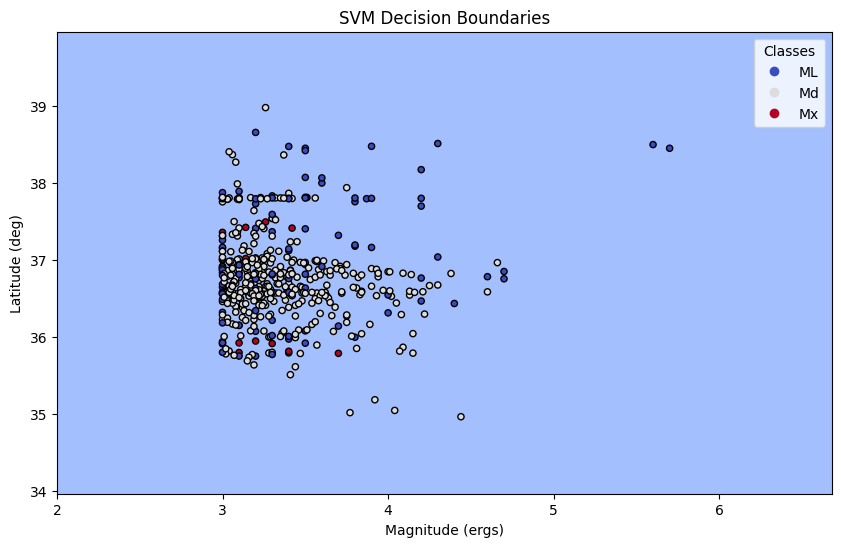

Classes: ['Mx' 'ML' 'Md' 'Mw']
Mean values of attributes by class:
           mag   latitude
magt                     
ML    3.538414  38.045590
Md    3.372034  37.458938
Mw    4.282268  38.052298
Mx    3.375556  37.146352


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Define a helper function to create a meshgrid
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Define a helper function to plot decision boundaries
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Load your data
# Replace 'Earthquake_Data.csv' with your file's name
df = pd.read_csv('Earthquake_Data.csv', delimiter=r'\s+')

# Clean column names: lowercase, remove leading/trailing spaces, replace spaces with underscores
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# Debug: Print column names to verify
print("Cleaned Column Names:")
print(df.columns)

# Subset the data (ensure these columns exist in your DataFrame)
subset_size = 500
features = df[['mag', 'latitude']][:subset_size].values
classes = df['magt'][:subset_size].values

# Encode class labels
le = LabelEncoder()
classes_encoded = le.fit_transform(classes)
class_names = le.classes_  # Original class names

# Train a single SVM model with multiclass support
svm = SVC(kernel='rbf', decision_function_shape='ovr', C=1.0)
svm.fit(features, classes_encoded)

# Create mesh grid
X0, X1 = features[:, 0], features[:, 1]
xx, yy = make_meshgrid(X0, X1)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plot_contours(plt, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Overlay the scatter plot of data points with a custom color map
scatter = plt.scatter(X0, X1, c=classes_encoded, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Add legend for classes
handles, _ = scatter.legend_elements()
plt.legend(handles, class_names, title="Classes")

# Add axis labels and title
plt.xlabel('Magnitude (ergs)')
plt.ylabel('Latitude (deg)')
plt.title('SVM Decision Boundaries')

# Display the plot
plt.show()

# Check unique classes
unique_classes = df['magt'].unique()
print("Classes:", unique_classes)

# Group data by classes
grouped_data = df.groupby('magt')[['mag', 'latitude']].mean()
print("Mean values of attributes by class:")
print(grouped_data)





In [ ]:
print(df.columns)
df['Magnitude_type'].unique()

Index(['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'Magnitude(ergs)',
       'Magnitude_type', 'No_of_Stations', 'Gap', 'Close', 'RMS', 'SRC',
       'EventID'],
      dtype='object')


array(['Mx', 'ML', 'Md', 'Mw'], dtype=object)

##Naive Bayes



>**Note: Naive bayes is used for strings and numbers(categorically) it can be used for classification so it can be either 1 or 0 nothing in between like 0.5 (regression). Even if we force naive bayes and tweak it a little bit for regression the result is disappointing; A team experimented with this and achieve not so good results.**





**`This code is just for predicting categorical data magnitude type with Naive Bayes`**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV file with space delimiter
df = pd.read_csv('/content/Earthquake_Data.csv', delimiter=r'\s+')

new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude",
                    "Magnitude_Category", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names

# Convert magnitude column to categorical data
df['Magnitude_Category'] = pd.cut(df['Magnitude'], bins=[0, 5, 6, 7, np.inf], labels=['Minor', 'Moderate', 'Strong', 'Major'])

# Encode Magnitude Category
le = LabelEncoder()
df['Magnitude_Category_Encoded'] = le.fit_transform(df['Magnitude_Category'])

# Normalize latitude and longitude values
scaler = MinMaxScaler()
df[['Latitude(deg)', 'Longitude(deg)']] = scaler.fit_transform(df[['Latitude(deg)', 'Longitude(deg)']])

# Select features
X = df[['Latitude(deg)', 'Longitude(deg)', 'No_of_Stations']]
y = df['Magnitude_Category_Encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gaussian Naive Bayes model on the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Use the trained model to make predictions on the testing data
y_pred = gnb.predict(X_test)


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate and print the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

cr = classification_report(y_test, y_pred, labels=[0, 1, 2, 3], target_names=['Minor', 'Moderate', 'Strong', 'Major'])
print('Classification Report:\n', cr)

Accuracy: 0.9853947125161767
Confusion Matrix:
 [[5327   35    1]
 [  38    3    1]
 [   4    0    0]]
Classification Report:
               precision    recall  f1-score   support

       Minor       0.00      0.00      0.00         0
    Moderate       0.99      0.99      0.99      5363
      Strong       0.08      0.07      0.07        42
       Major       0.00      0.00      0.00         4

   micro avg       0.99      0.99      0.99      5409
   macro avg       0.27      0.27      0.27      5409
weighted avg       0.98      0.99      0.98      5409



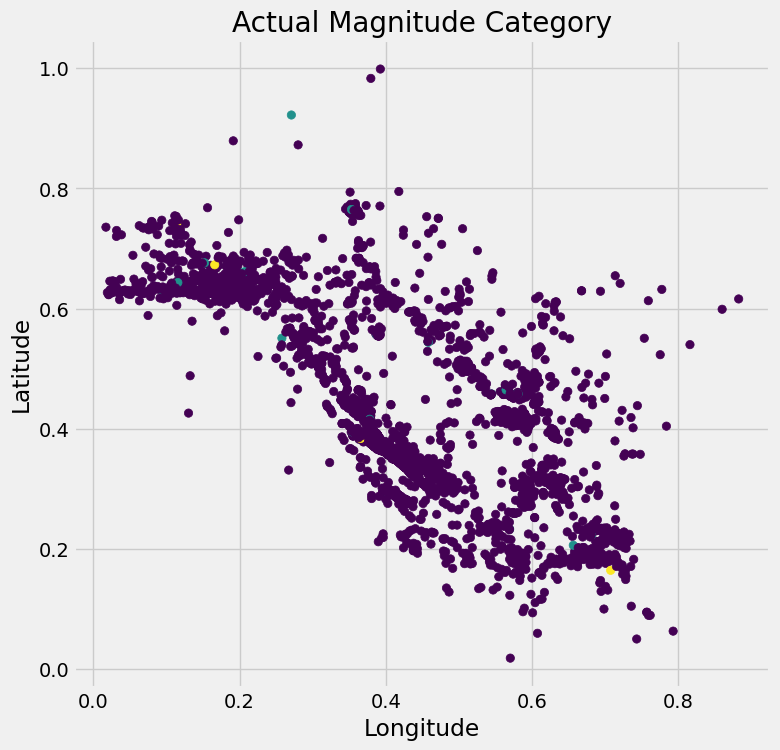

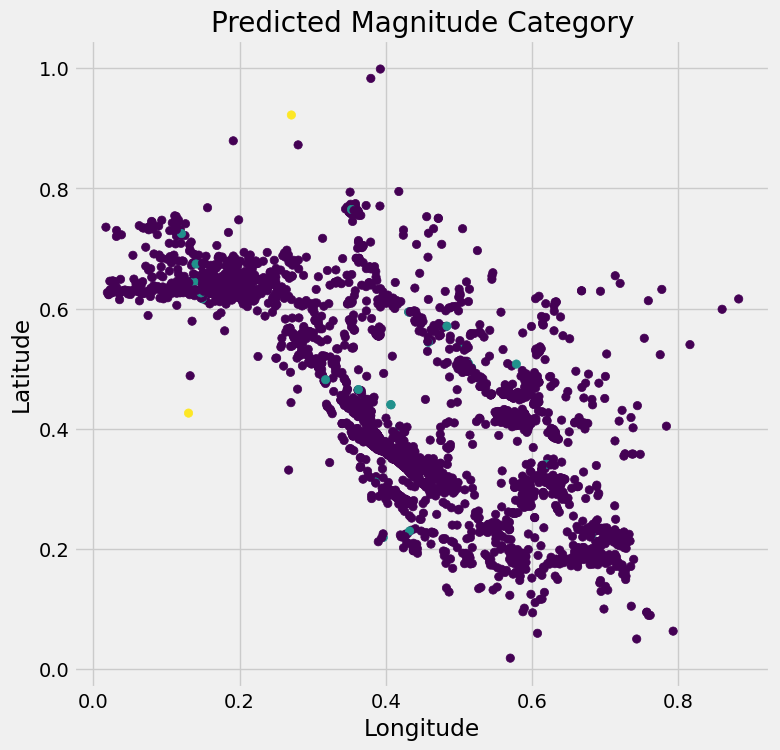

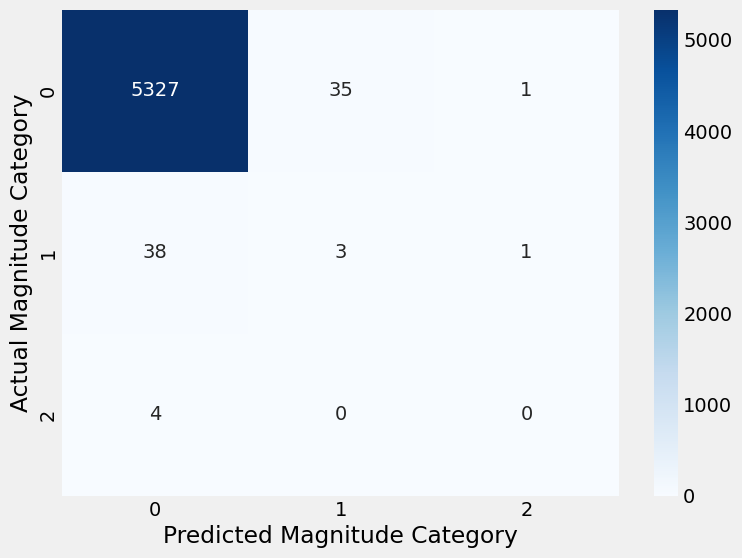

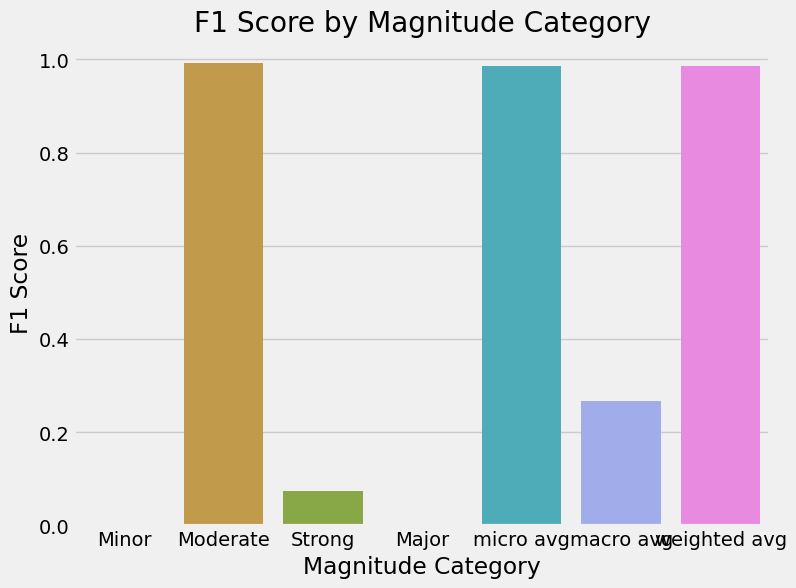

In [ ]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Longitude(deg)'], X_test['Latitude(deg)'], c=y_test, cmap='viridis')
plt.title('Actual Magnitude Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
print(" ")
plt.figure(figsize=(8, 8))
plt.scatter(X_test['Longitude(deg)'], X_test['Latitude(deg)'], c=y_pred, cmap='viridis')
plt.title('Predicted Magnitude Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
print(" ")


# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Magnitude Category')
plt.ylabel('Actual Magnitude Category')
plt.show()
print(" ")

cr = classification_report(y_test, y_pred, labels=[0, 1, 2, 3], target_names=['Minor', 'Moderate', 'Strong', 'Major'], output_dict=True)
# Convert classification report dictionary to DataFrame
cr_df = pd.DataFrame(cr).transpose()

# Create bar plot of classification report scores
plt.figure(figsize=(8, 6))
sns.barplot(x=cr_df.index, y=cr_df['f1-score'])
plt.xlabel('Magnitude Category')
plt.ylabel('F1 Score')
plt.title('F1 Score by Magnitude Category')
plt.show()
print(" ")

##Random Forest

<h3>Loading the model and fitting it with training data</h3>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

<h3>Predict the testing data and evaluate it</h3>
Find the predicted values and evaluate it using metrics like MSE, r2

In [ ]:
# Predict the target variable on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

scores['mse'].append(mse)
scores['R^2'].append(r2)

print('Mean Squared Error: ', mse)
print('R^2 Score: ', r2)

Mean Squared Error:  0.15599116006378258
R^2 Score:  0.1428805732295345


<h3>Plot model</h3>

**Scatter plot**

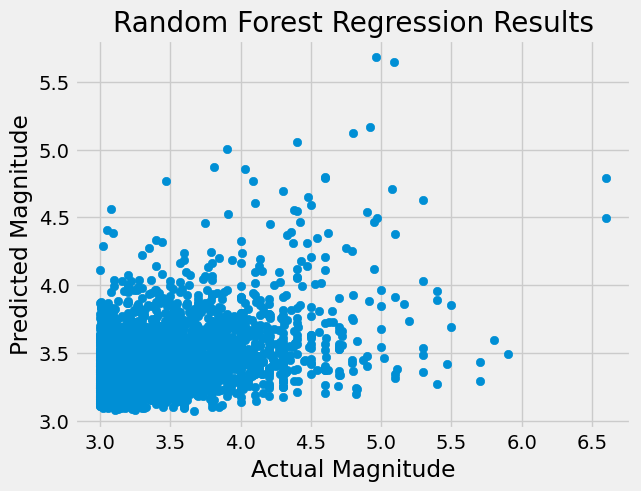

In [ ]:
# Plot the predicted and actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Random Forest Regression Results')
plt.show()

**Feature Importance**<br>
This plot shows the importance of each feature in the model. You can create a feature importance plot using the feature_importances_ attribute of the random forest model.

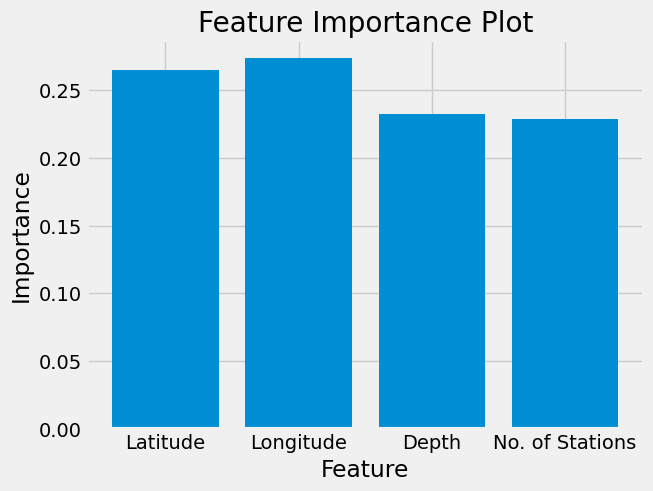

In [ ]:
importances = rf.feature_importances_
features = ['Latitude', 'Longitude', 'Depth', 'No. of Stations']
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

**Residual Plot**<br>
A residual plot shows the difference between the actual values and the predicted values. You can create a residual plot using the residplot() function from the seaborn library.

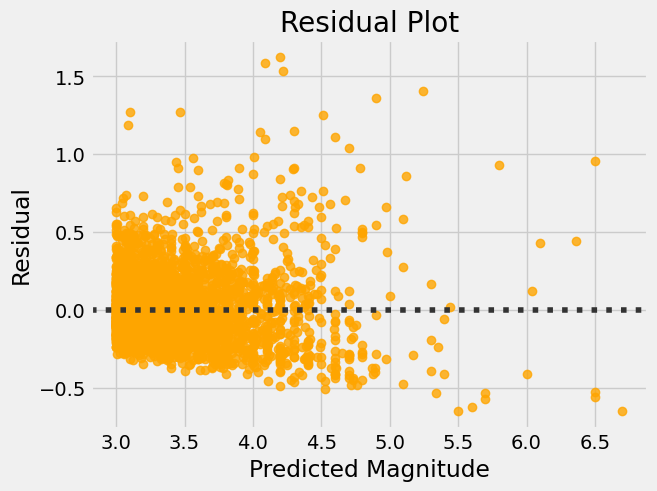

In [ ]:
import seaborn as sns
sns.residplot(x= y_test, y =y_pred, color='orange')
plt.xlabel('Predicted Magnitude')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

**Actual vs. Predicted Line Plot**<br>
Actual vs. Predicted Line Plot: A line plot can be used to show the trend of the actual and predicted values over time (if the data is time-series). You can create a line plot using the plot() function.

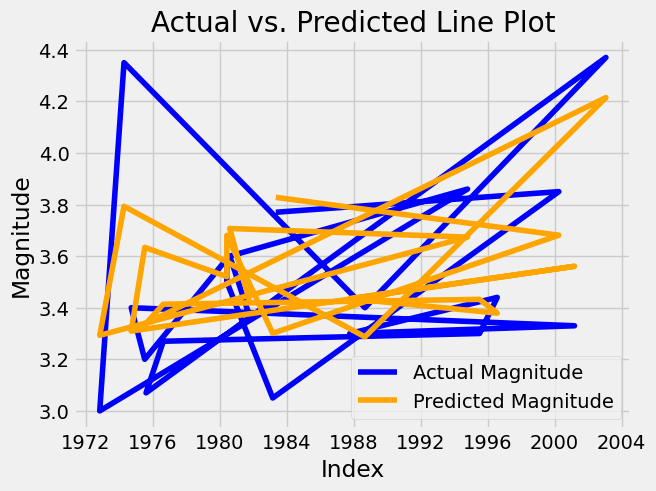

In [ ]:
plt.plot(y_test.index[:20], y_test[:20], color='blue', label='Actual Magnitude')
plt.plot(y_test.index[:20], y_pred[:20], color='orange', label='Predicted Magnitude')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.title('Actual vs. Predicted Line Plot')
plt.legend()
plt.show()

<h2>Concluding the accurate model</h2>

In [ ]:
scores_df = pd.DataFrame(scores)
display(scores_df)

,Model name,mse,R^2
0,Linear regression,0.175628,0.034983
1,SVM,0.531661,-1.921297
2,Random Forest,0.155991,0.142881


,Model name,mse,R^2
0,Linear regression,0.175628,0.034983
1,SVM,0.531661,-1.921297
2,Random Forest,0.155991,0.142881


In [ ]:
scores_df[scores_df["mse"] == scores_df["mse"].min()]

,Model name,mse,R^2
2,Random Forest,0.155991,0.142881


In [ ]:
scores_df[scores_df["R^2"] == scores_df["R^2"].max()]

,Model name,mse,R^2
2,Random Forest,0.155991,0.142881


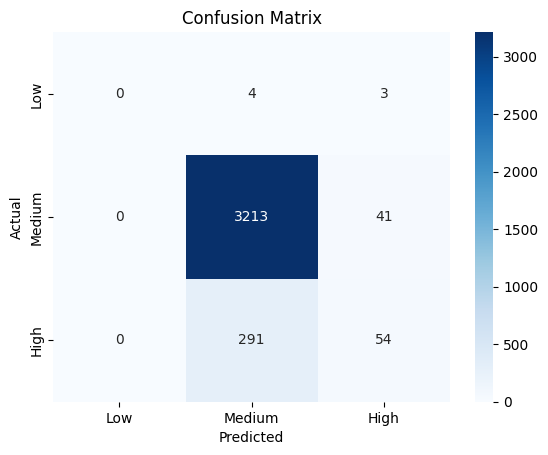

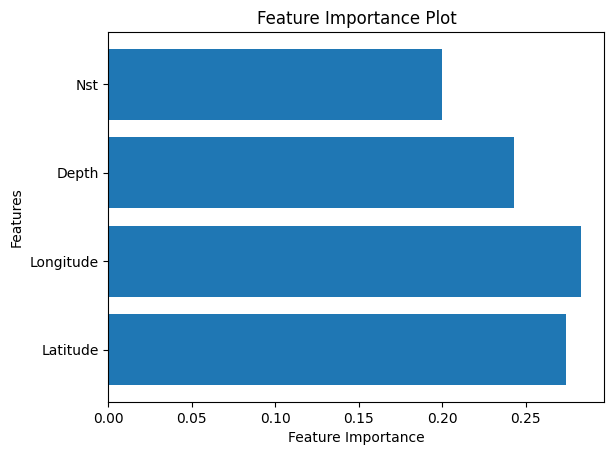

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Low', 'Medium', 'High'],
               yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Classification Report
#from sklearn.metrics import classification_report
#print( classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

#Feature importance
importances = rf_classifier.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

<ipython-input-70-485aa9681d1c>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/Earthquake_Data.csv', delim_whitespace=True)


Sample 1: Risk Score: 2.13
Sample 1: Likelihoods={'Low': 0.0, 'Medium': 0.71, 'High': 0.29}, Consequences=Moderate damage, some injuries, potential economic losses, Risk Level=None, Risk Score: 2.13
Sample 2: Risk Score: 2.8499999999999996
Sample 2: Likelihoods={'Low': 0.0, 'Medium': 0.95, 'High': 0.05}, Consequences=Moderate damage, some injuries, potential economic losses, Risk Level=None, Risk Score: 2.8499999999999996
Sample 3: Risk Score: 2.94
Sample 3: Likelihoods={'Low': 0.0, 'Medium': 0.98, 'High': 0.02}, Consequences=Moderate damage, some injuries, potential economic losses, Risk Level=None, Risk Score: 2.94
Sample 4: Risk Score: 2.61
Sample 4: Likelihoods={'Low': 0.0, 'Medium': 0.87, 'High': 0.13}, Consequences=Moderate damage, some injuries, potential economic losses, Risk Level=None, Risk Score: 2.61
Sample 5: Risk Score: 2.55
Sample 5: Likelihoods={'Low': 0.0, 'Medium': 0.85, 'High': 0.15}, Consequences=Moderate damage, some injuries, potential economic losses, Risk Level=

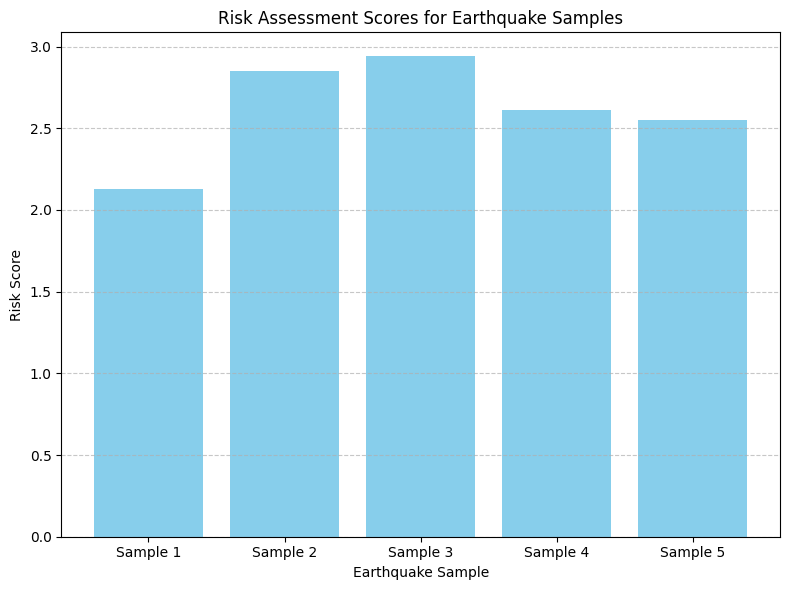

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the data
df = pd.read_csv('/Earthquake_Data.csv', delim_whitespace=True)

# Define magnitude thresholds
high_threshold = 6.0
low_threshold = 4.0

# Create a new column for magnitude categories
df['Magnitude_Category'] = pd.cut(df['Mag'],
                                  bins=[-np.inf, low_threshold, high_threshold, np.inf],
                                  labels=['Low', 'Medium', 'High'])

# Select relevant columns
X = df[['Latitude', 'Longitude', 'Depth', 'Nst']]
y = df['Magnitude_Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict probabilities for the test set
probabilities = rf_classifier.predict_proba(X_test)

# --- Risk Assessment ---
# 1. Define Hazard Levels (already done with Magnitude_Category)

# 2. Estimate Likelihood (using probabilities)
def estimate_likelihood(probabilities, index):
    """Estimates likelihood of each hazard level for a given data point."""
    likelihoods = {
        "Low": probabilities[index][0],
        "Medium": probabilities[index][1],
        "High": probabilities[index][2]
    }
    return likelihoods

# 3. Assess Consequences (define a function or dictionary)
def assess_consequences(hazard_level):
    """Assesses consequences based on hazard level."""
    if hazard_level == "Low":
        return "Minor damage, few injuries"
    elif hazard_level == "Medium":
        return "Moderate damage, some injuries, potential economic losses"
    elif hazard_level == "High":
        return "Significant damage, many injuries/fatalities, major economic losses"
    else:
        return "Unknown hazard level"
# Return the consequence or a default value if it's None
    if consequence is None:
        print(f"Warning: assess_consequences returned None for hazard_level: {hazard_level}")
        return "Low"  # Or raise a ValueError as before
    else:
        return consequence

 # Define consequence scores
consequence_scores = {
    "Minor damage, few injuries": 1,
    "Moderate damage, some injuries, potential economic losses": 3,
    "Significant damage, many injuries/fatalities, major economic losses": 5
}
# 4. Quantify Risk (example using a simple risk matrix)
def quantify_risk(likelihoods, consequences):
    """Quantifies risk based on likelihood and consequences."""
    risk_level = "Low"  # Default to low risk

    # Determine predicted_hazard_level based on highest likelihood
    predicted_hazard_level = max(likelihoods, key=likelihoods.get)

    # Adjust thresholds and conditions for risk level assignment
    if likelihoods["High"] > 0.2:  # High likelihood of High hazard
        risk_level = "High"
    elif likelihoods["Medium"] > 0.7 and consequences[predicted_hazard_level] == "Moderate damage, some injuries, potential economic losses":
        risk_level = "Medium"  # Medium likelihood of Medium hazard with moderate consequences
    elif likelihoods["High"] > 0.05 and consequences[predicted_hazard_level] == assess_consequences("High"): # Moderate likelihood of High hazard with significant consequences
        risk_level = "Medium"
    elif likelihoods["High"] < 0.1 and likelihoods["Medium"] < 0.5: # Explicit Low-Risk Condition
        risk_level = "Low"
# 5. Risk Assessment Score
def risk_assessment_score(likelihoods, consequences):
    """Calculates a numerical risk assessment score."""

    # Define consequence scores (adjust as needed)
    consequence_scores = {
        "Minor damage, few injuries": 1,
        "Moderate damage, some injuries, potential economic losses": 3,
        "Significant damage, many injuries/fatalities, major economic losses": 5
    }

    # Determine predicted_hazard_level based on highest likelihood
    predicted_hazard_level = max(likelihoods, key=likelihoods.get)

    # Get likelihood score (probability of predicted hazard level)
    likelihood_score = likelihoods[predicted_hazard_level]

    # Get consequence score
    consequence_score = consequence_scores.get(consequences[predicted_hazard_level], 0)  # Handle cases where consequence is not in the dictionary

    # Calculate risk score
    risk_score = likelihood_score * consequence_score

    return risk_score

# 6. Visualize Risk Scores
def visualize_risk_scores(risk_scores, sample_labels):
    """Visualizes risk scores using a bar chart."""
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.bar(sample_labels, risk_scores, color='skyblue')  # Create bar chart
    plt.title("Risk Assessment Scores for Earthquake Samples")
    plt.xlabel("Earthquake Sample")
    plt.ylabel("Risk Score")
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the chart

# --- Example Usage ---
risk_scores = []  # Store risk scores for visualization
sample_labels = []  # Store sample labels for visualization

for i in range(5):  # For the first 5 samples
    likelihoods = estimate_likelihood(probabilities, i)
    predicted_hazard_level = max(likelihoods, key=likelihoods.get)
    consequences = {"Low": assess_consequences("Low"),
                    "Medium": assess_consequences("Medium"),
                    "High": assess_consequences("High")}

    risk_score = risk_assessment_score(likelihoods, consequences)
    risk_scores.append(risk_score)  # Add risk score to the list
    sample_labels.append(f"Sample {i+1}")  # Add sample label to the list
    print(f"Sample {i+1}: Risk Score: {risk_score}")
    risk_level = quantify_risk(likelihoods, consequences)
    print(f"Sample {i+1}: Likelihoods={likelihoods}, Consequences={consequences[predicted_hazard_level]}, Risk Level={risk_level}, Risk Score: {likelihoods[predicted_hazard_level] * consequence_scores.get(consequences[predicted_hazard_level], 0)}")

# Call the visualization function
visualize_risk_scores(risk_scores, sample_labels)










<ipython-input-72-1193d0acfe47>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby([pd.cut(df['Latitude'], latitude_bins), pd.cut(df['Longitude'], longitude_bins)])['Mag'].mean().reset_index()


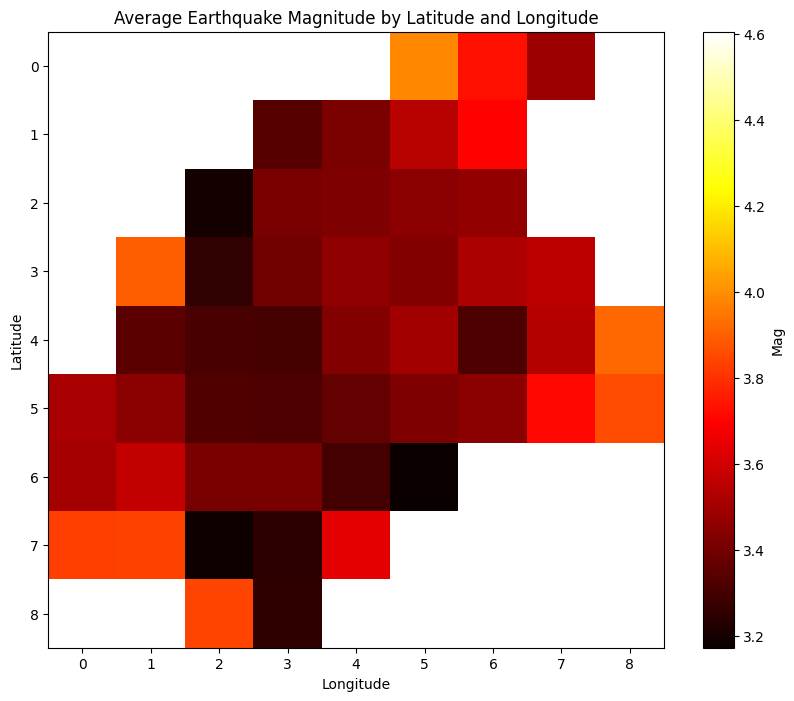

In [ ]:
# Create latitude and longitude bins
latitude_bins = np.linspace(df['Latitude'].min(), df['Latitude'].max(), num=10)  # Adjust num for desired bin size
longitude_bins = np.linspace(df['Longitude'].min(), df['Longitude'].max(), num=10)

# Group data by bins and calculate average magnitude
grouped_data = df.groupby([pd.cut(df['Latitude'], latitude_bins), pd.cut(df['Longitude'], longitude_bins)])['Mag'].mean().reset_index()

# Create a pivot table for heatmap
heatmap_data = grouped_data.pivot(index='Latitude', columns='Longitude', values='Mag')

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.title("Average Earthquake Magnitude by Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Mag")
plt.show()